In [5]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config=ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [6]:
from tensorflow.keras.layers import Input,Lambda,Dense,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [7]:
Image_size=[224,224]
train_path='/content/drive/MyDrive/project for resume/train'
valid_path='/content/drive/MyDrive/project for resume/test'

In [9]:
# Import the Resnet50 library as shown below and add preprocessing layer to the front of resnt
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=Image_size + [3], weights='imagenet', include_top=False)




94773248/94765736 [==============================] - 1s 0us/step


In [10]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [11]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/project for resume/train/*')

In [12]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [14]:
prediction = Dense(len(folders),activation='softmax')(x)
# create a model object
model=Model(inputs=resnet.input , outputs=prediction)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [16]:
# Use the Image Data Generator to import the images from the dataset
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [17]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/project for resume/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [23]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/project for resume/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [25]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [26]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 1073s 17s/step - loss: 3.8138 - accuracy: 0.3452 - val_loss: 1.1682 - val_accuracy: 0.6111
Epoch 2/20
61/61 [==============================] - 44s 717ms/step - loss: 1.1230 - accuracy: 0.5592 - val_loss: 1.2004 - val_accuracy: 0.6111
Epoch 3/20
61/61 [==============================] - 44s 718ms/step - loss: 0.9559 - accuracy: 0.6405 - val_loss: 1.1956 - val_accuracy: 0.4444
Epoch 4/20
61/61 [==============================] - 44s 715ms/step - loss: 0.9313 - accuracy: 0.6041 - val_loss: 0.7703 - val_accuracy: 0.6111
Epoch 5/20
61/61 [==============================] - 44s 712ms/step - loss: 0.7352 - accuracy: 0.7076 - val_loss: 1.1422 - val_accuracy: 0.7222
Epoch 6/20
61/61 [==============================] - 44s 716ms/step - loss: 1.0939 - accuracy: 0.6200 - val_loss: 0.7908 - val_accuracy: 0.6667
Epoch 7/20
61/61 [==============================] - 44s 716ms/step - loss: 0.8424 - accuracy: 0.6679 - val_loss: 0.9425 - val_accuracy: 0.6667

In [27]:
import matplotlib.pyplot as plt

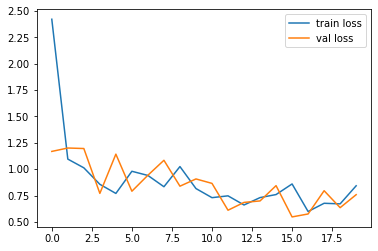

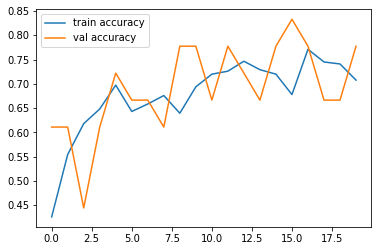

<Figure size 432x288 with 0 Axes>

In [29]:
#plot the loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('lossval_loss')

#plot the accuracy
plt.plot(r.history['accuracy'],label='train accuracy')
plt.plot(r.history['val_accuracy'],label='val accuracy')
plt.legend()
plt.show()
plt.savefig('accval_acc')

In [30]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [31]:

y_pred = model.predict(test_set)


In [32]:
y_pred

array([[1.30812172e-03, 2.85351725e-05, 2.82080541e-03, 9.95842516e-01],
       [5.75407408e-03, 8.32414150e-01, 8.97282641e-03, 1.52859002e-01],
       [9.73466575e-01, 2.46149762e-06, 1.28507698e-02, 1.36802057e-02],
       [7.18926676e-05, 1.08987726e-01, 2.49156915e-03, 8.88448834e-01],
       [1.26436193e-04, 9.48679984e-01, 3.47023088e-05, 5.11588790e-02],
       [2.35742235e-04, 9.03854072e-01, 9.53869708e-03, 8.63715485e-02],
       [4.52752836e-04, 2.15622243e-02, 1.63021740e-02, 9.61682916e-01],
       [1.24447412e-04, 9.67206836e-01, 8.22426844e-03, 2.44444534e-02],
       [2.11283285e-03, 6.79050526e-03, 9.69956338e-01, 2.11403612e-02],
       [2.33069435e-03, 2.80600879e-03, 9.93072450e-01, 1.79088663e-03],
       [3.66535232e-06, 1.96453720e-06, 9.99418616e-01, 5.75859391e-04],
       [1.01859398e-04, 9.94863689e-01, 1.80016941e-05, 5.01645030e-03],
       [1.89402112e-04, 1.31496135e-03, 9.93963301e-01, 4.53231670e-03],
       [1.82211283e-04, 3.34733993e-01, 1.28913429e

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([3, 1, 0, 3, 1, 1, 3, 1, 2, 2, 2, 1, 2, 3, 1, 3, 2, 1])

In [35]:
# now try with one only 1 image 

In [43]:
img=load_img('/content/drive/MyDrive/project for resume/test/diseased cotton leaf/dis_leaf (322).jpg',target_size=(224,224))

In [44]:
x=image.img_to_array(img)

In [45]:
x.shape

(224, 224, 3)

In [46]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [47]:
model.predict(img_data)

array([[2.6483412e-04, 6.4659784e-34, 9.9973518e-01, 2.8663091e-25]],
      dtype=float32)

In [48]:
a=np.argmax(model.predict(img_data), axis=1)

In [51]:
a

array([2])

In [50]:
folders[2]

'/content/drive/MyDrive/project for resume/train/diseased cotton leaf'

In [52]:
# so our prediction is correct